In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [3]:
from scipy.stats import skew

In [4]:
train_df = pd.read_csv('../data/orignal/train.csv', index_col = 0)
test_df = pd.read_csv('../data/orignal/test.csv', index_col = 0)
combine_df = pd.concat([train_df, test_df])

In [5]:
# 相关性检测
#correlation matrix
# corrmat = train_df.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True)
# plt.show()

In [6]:
def fixSkew(feature_df, name):
    skewed_feat = skew(feature_df[name])
    if skewed_feat > 0.75:
        print('fix')
        return np.log1p(feature_df[name])
    else:
        print('notfix')
        return feature_df[name]

In [7]:
#saleprice correlation matrix
# k = 30 #number of variables for heatmap
# f, ax = plt.subplots(figsize=(16, 12))
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm = np.corrcoef(train_df[cols].values.T)
# #sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [8]:
#saleprice correlation matrix
# k = 10 #number of variables for heatmap
# f, ax = plt.subplots(figsize=(5, 4))
# cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
# cols = cols.values.tolist()
# cols.append('SalePrice')

# cm = np.corrcoef(train_df[cols].values.T)
# #sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols, xticklabels=cols)
# plt.show()


### MSSubClass
涉及销售的寓所类型


In [9]:
combine_df[combine_df['MSSubClass'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,


In [12]:
combine_df['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

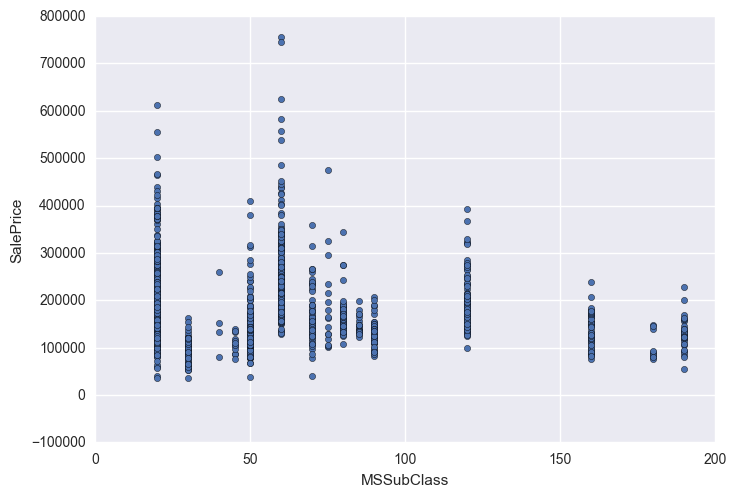

In [14]:
var = 'MSSubClass'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()

In [17]:
process_df = pd.get_dummies(combine_df['MSSubClass'], prefix='MSSubClass')

### MSZoning
售卖的地产区域类型

In [24]:
combine_df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [23]:
combine_df[combine_df['MSZoning'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1916,810,0,0,NaN,1,1Fam,NaN,NaN,0.0,0.0,...,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950,2009
2217,733,0,0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,WD,0,Pave,4,0.0,AllPub,0,1952,1952,2008
2251,1150,686,0,NaN,4,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,686.0,AllPub,0,1900,1950,2008
2905,1600,0,0,NaN,3,1Fam,NaN,NaN,0.0,0.0,...,WD,0,Pave,6,0.0,AllPub,0,1951,1951,2006


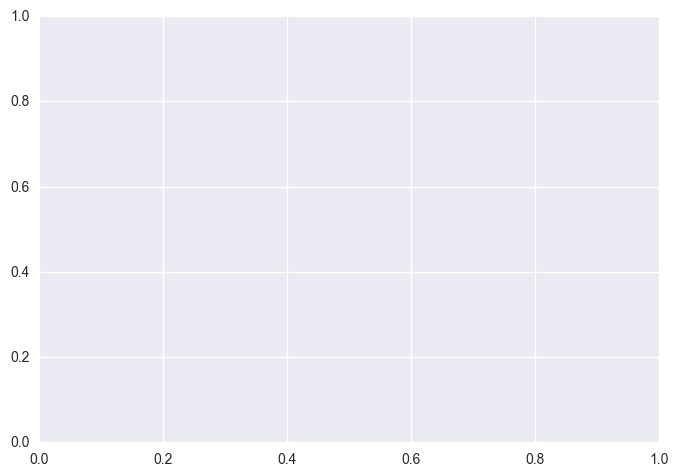

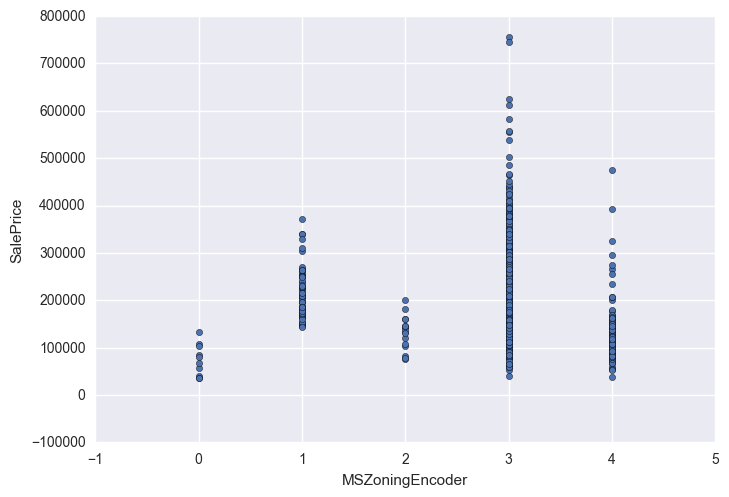

In [27]:
var = 'MSZoningEncoder'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');
plt.show()

In [ ]:
process_df

In [26]:
combine_df['MSZoning'] = combine_df['MSZoning'].fillna('RL')
le = preprocessing.LabelEncoder()
le.fit(combine_df['MSZoning'])
combine_df['MSZoningEncoder'] = le.transform(combine_df['MSZoning'])

### LotFrontage
距离最近的街道的直线距离  
填充中位数  
数值标准化

In [14]:
lot_frontage_df = combine_df['LotFrontage'].fillna(combine_df['LotFrontage'].median())
lot_frontage_df = pd.DataFrame(preprocessing.scale(lot_frontage_df.values), np.array(range(1, 2920)), columns=['LotFrontage'])
lot_frontage_df.index.name = 'Id'

In [15]:
combine_df['LotFrontage'].isnull().count()

2919

### LotArea
房产占地面积  
数值标准化

In [16]:
lot_area_df = pd.DataFrame(preprocessing.scale(combine_df['LotArea']), np.array(range(1, 2920)), columns=['LotArea'])
lot_area_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### Street
取值不平衡 丢弃该特征

In [17]:
combine_df['Street'].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

### Alley


In [18]:
combine_df['Alley_Access'] = combine_df['Alley'].apply(lambda x : 0 if pd.isnull(x) else 1)
combine_df['Alley'] = combine_df['Alley'].fillna('NoAccess')
combine_df['Alley'].value_counts()
le = preprocessing.LabelEncoder()
le.fit(combine_df['Alley'])
combine_df['Alley'] = le.transform(combine_df['Alley'])

### LotShape
住宅的房型

In [19]:
combine_df['LotShape'].value_counts()
le = preprocessing.LabelEncoder()
le.fit(combine_df['LotShape'])
combine_df['LotShape'] = le.transform(combine_df['LotShape'])

### LandContour
住宅的地面是否平坦

In [20]:
combine_df['LandContour'].value_counts()
le = preprocessing.LabelEncoder()
le.fit(combine_df['LandContour'])
combine_df['LandContour'] = le.transform(combine_df['LandContour'])

### Utilities
配套设施  
[不平衡] 丢弃

In [21]:
combine_df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

### LotConfig
住宅的地理类型

In [22]:
combine_df['LotConfig'].value_counts()
le = preprocessing.LabelEncoder()
le.fit(combine_df['LotConfig'])
combine_df['LotConfig'] = le.transform(combine_df['LotConfig'])

### LandSlope
住宅的倾斜度

In [23]:
combine_df['LandSlope'].value_counts() 
le = preprocessing.LabelEncoder()
le.fit(combine_df['LandSlope'])
combine_df['LandSlope'] = le.transform(combine_df['LandSlope'])

### Neighborhood
在AME城中的物理位置

In [24]:
combine_df['Neighborhood'].value_counts()
le = preprocessing.LabelEncoder()
le.fit(combine_df['Neighborhood'])
combine_df['Neighborhood'] = le.transform(combine_df['Neighborhood'])

### Condition1
附近的情况

In [25]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Condition1'])
combine_df['Condition1'] = le.transform(combine_df['Condition1'])
combine_df['Condition1'].value_counts()

2    2511
1     164
0      92
6      50
4      39
5      28
3      20
8       9
7       6
Name: Condition1, dtype: int64

### Condition2
附近的情况

In [26]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Condition2'])
combine_df['Condition2'] = le.transform(combine_df['Condition2'])
combine_df['Condition2'].value_counts()

2    2889
1      13
0       5
3       4
4       4
7       2
5       1
6       1
Name: Condition2, dtype: int64

### BldgType
住宅类型

In [27]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BldgType'])
combine_df['BldgType'] = le.transform(combine_df['BldgType'])
combine_df['BldgType'].value_counts()

0    2425
4     227
2     109
3      96
1      62
Name: BldgType, dtype: int64

### HouseStyle
住宅风格

In [28]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['HouseStyle'])
combine_df['HouseStyle'] = le.transform(combine_df['HouseStyle'])
combine_df['HouseStyle'].value_counts()

2    1471
5     872
0     314
7     128
6      83
4      24
1      19
3       8
Name: HouseStyle, dtype: int64

### OverallQual
装修覆盖率及装修完成度

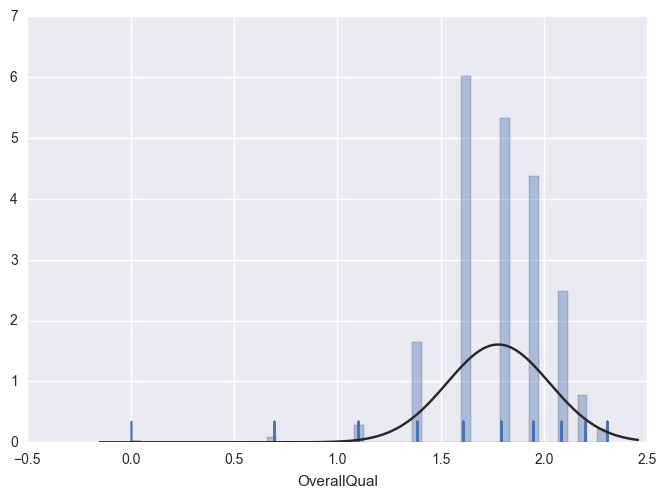

In [29]:
sns.distplot(np.log(combine_df['OverallQual']), fit=norm,  kde=False, rug=True)
fig = plt.figure()
plt.show()

In [30]:
overall_qual_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'OverallQual')), np.array(range(1, 2920)), columns=['OverallQual'])
overall_qual_df.index.name = 'Id'

notfix


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### OverallCond
住宅的整体状况

In [31]:
overall_cond_df = pd.DataFrame(preprocessing.scale(combine_df['OverallCond'].values), np.array(range(1, 2920)), columns=['OverallCond'])
overall_cond_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### YearBuilt
原始施工日期  
计算原始施工日到目前(2016年)总共多少年

In [32]:
combine_df['YearBuilt'] = combine_df['YearBuilt'].apply(lambda x : 2016 - x)

In [33]:
year_built_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'YearBuilt')), np.array(range(1, 2920)), columns=['YearBuilt'])

notfix


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### YearRemodAdd
改造时间年份
计算原始施工日到目前(2016年)总共多少年

In [34]:
year_remodadd_df = pd.DataFrame(2016 - combine_df['YearRemodAdd'])

### RoofStyle
屋顶类型

In [35]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['RoofStyle'])
combine_df['RoofStyle'] = le.transform(combine_df['RoofStyle'])
combine_df['RoofStyle'].value_counts()

1    2310
3     551
2      22
0      20
4      11
5       5
Name: RoofStyle, dtype: int64

### RoofMatl
屋顶材料

In [36]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['RoofMatl'])
combine_df['RoofMatl'] = le.transform(combine_df['RoofMatl'])
combine_df['RoofMatl'].value_counts()

1    2876
5      23
6       9
7       7
3       1
4       1
2       1
0       1
Name: RoofMatl, dtype: int64

### Exterior1st
房子的外观

In [37]:
combine_df[combine_df['Exterior1st'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access
Id,,,,,,,,,,,,,,,,,,,,,
2152,1518,0,0,1,2,0,TA,Gd,1035.0,0.0,...,0,Pave,5,1580.0,AllPub,0,76,2007,2008,0


In [38]:
combine_df['Exterior1st'] = combine_df['Exterior1st'].fillna('VinylSd')
le = preprocessing.LabelEncoder()
le.fit(combine_df['Exterior1st'])
combine_df['Exterior1st'] = le.transform(combine_df['Exterior1st'])
combine_df['Exterior1st'].value_counts()

12    1026
8      450
6      442
13     411
9      221
5      126
3       87
14      56
0       44
11      43
2        6
1        2
10       2
4        2
7        1
Name: Exterior1st, dtype: int64

### Exterior2nd
房子的外观

In [39]:
combine_df[combine_df['Exterior2nd'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access
Id,,,,,,,,,,,,,,,,,,,,,
2152,1518,0,0,1,2,0,TA,Gd,1035.0,0.0,...,0,Pave,5,1580.0,AllPub,0,76,2007,2008,0


In [40]:
combine_df['Exterior2nd'] = combine_df['Exterior2nd'].fillna('VinylSd')
le = preprocessing.LabelEncoder()
le.fit(combine_df['Exterior2nd'])
combine_df['Exterior2nd'] = le.transform(combine_df['Exterior2nd'])
combine_df['Exterior2nd'].value_counts()

13    1015
8      447
6      406
14     391
10     270
5      126
15      81
3       47
12      47
0       38
2       22
7       15
11       6
1        4
4        3
9        1
Name: Exterior2nd, dtype: int64

### MasVnrType
表层砌体类型

In [41]:
combine_df['MasVnrType'] = combine_df['MasVnrType'].fillna('None')
le = preprocessing.LabelEncoder()
le.fit(combine_df['MasVnrType'])
combine_df['MasVnrType'] = le.transform(combine_df['MasVnrType'])
combine_df['MasVnrType'].value_counts()

2    1766
1     879
3     249
0      25
Name: MasVnrType, dtype: int64

### MasVnrArea
表层砌面面积

In [42]:
combine_df['MasVnrArea'].median()

0.0

In [43]:
combine_df['MasVnrArea'] = combine_df['MasVnrArea'].fillna(combine_df['MasVnrArea'].median())
mas_vnr_area_df = pd.DataFrame(preprocessing.scale(combine_df['MasVnrArea']), np.array(range(1, 2920)), columns=['MasVnrArea'])
mas_vnr_area_df.index.name = 'Id'

### ExterQual
外观材料质量

In [44]:
combine_df['ExterQual'].isnull().any()

False

In [45]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['ExterQual'])
combine_df['ExterQual'] = le.transform(combine_df['ExterQual'])

In [46]:
combine_df['ExterQual'].value_counts()

3    1798
2     979
0     107
1      35
Name: ExterQual, dtype: int64

### ExterCond
外部材料现状

In [47]:
combine_df['ExterCond'].isnull().any()

False

In [48]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['ExterCond'])
combine_df['ExterCond'] = le.transform(combine_df['ExterCond'])

In [49]:
combine_df['ExterCond'].value_counts()

4    2538
2     299
1      67
0      12
3       3
Name: ExterCond, dtype: int64

### Foundation
地基类型

In [50]:
combine_df['Foundation'].isnull().any()

False

In [51]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Foundation'])
combine_df['Foundation'] = le.transform(combine_df['Foundation'])

In [52]:
combine_df['Foundation'].value_counts()

2    1308
1    1235
0     311
3      49
4      11
5       5
Name: Foundation, dtype: int64

### Bsmt
是否有地下室

In [53]:
combine_df['Has_Bsmt'] = combine_df['BsmtQual'].apply(lambda x : 0 if pd.isnull(x) else 1)

### BsmtQual
地下室高度

In [54]:
combine_df['BsmtQual'] = combine_df['BsmtQual'].fillna('No_Bsmt')

In [55]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtQual'])
combine_df['BsmtQual'] = le.transform(combine_df['BsmtQual'])

### BsmtCond
地下室的环境条件

In [56]:
combine_df['BsmtCond'] = combine_df['BsmtCond'].fillna('No_Bsmt')

In [57]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtCond'])
combine_df['BsmtCond'] = le.transform(combine_df['BsmtCond'])

### BsmtExposure
光照条件

In [58]:
combine_df['BsmtExposure'] = combine_df['BsmtExposure'].fillna('No_Bsmt')

In [59]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtExposure'])
combine_df['BsmtExposure'] = le.transform(combine_df['BsmtExposure'])

### BsmtFinType1
地下室装修完成度

In [60]:
combine_df['BsmtFinType1'] = combine_df['BsmtFinType1'].fillna('No_Bsmt')

In [61]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtFinType1'])
combine_df['BsmtFinType1'] = le.transform(combine_df['BsmtFinType1'])

### BsmtFinSF1
Type1完成的面积

In [62]:
combine_df['BsmtFinSF1'] = combine_df['BsmtFinSF1'].fillna(0)

In [63]:
bsmt_fin_SF1_df = pd.DataFrame(preprocessing.scale(combine_df['BsmtFinSF1']), np.array(range(1, 2920)), columns=['BsmtFinSF1'])
bsmt_fin_SF1_df.index.name = 'Id'

### BsmtFinType2
地下室装修完成度

In [64]:
combine_df['BsmtFinType2'] = combine_df['BsmtFinType2'].fillna('No_Bsmt')

In [65]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['BsmtFinType2'])
combine_df['BsmtFinType2'] = le.transform(combine_df['BsmtFinType2'])

### BsmtFinSF2
Type2完成的面积

In [66]:
combine_df['BsmtFinSF2'] = combine_df['BsmtFinSF2'].fillna(0)

In [67]:
bsmt_fin_SF2_df = pd.DataFrame(preprocessing.scale(combine_df['BsmtFinSF2']), np.array(range(1, 2920)), columns=['BsmtFinSF2'])
bsmt_fin_SF2_df.index.name = 'Id'

### BsmtUnfSF
未完成的地下室面积

In [68]:
combine_df[combine_df['BsmtUnfSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,0,2,4,0.0,0.0,...,Pave,4,NaN,AllPub,0,70,1950,2008,0,0


In [69]:
combine_df.ix[2121, 'BsmtUnfSF'] = 0

In [70]:
bsmt_unf_sf_df = pd.DataFrame(preprocessing.scale(combine_df['BsmtUnfSF']), np.array(range(1, 2920)), columns=['BsmtUnfSF'])
bsmt_unf_sf_df.index.name = 'Id'

### TotalBsmtSF
地下室总面积

In [71]:
combine_df[combine_df['TotalBsmtSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,0,2,4,0.0,0.0,...,Pave,4,NaN,AllPub,0,70,1950,2008,0,0


In [72]:
combine_df.ix[2121, 'TotalBsmtSF'] = 0

In [73]:
total_bsmt_sf_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'TotalBsmtSF')), np.array(range(1, 2920)), columns=['TotalBsmtSF'])
total_bsmt_sf_df.index.name = 'Id'

fix


In [74]:
### GrLivArea


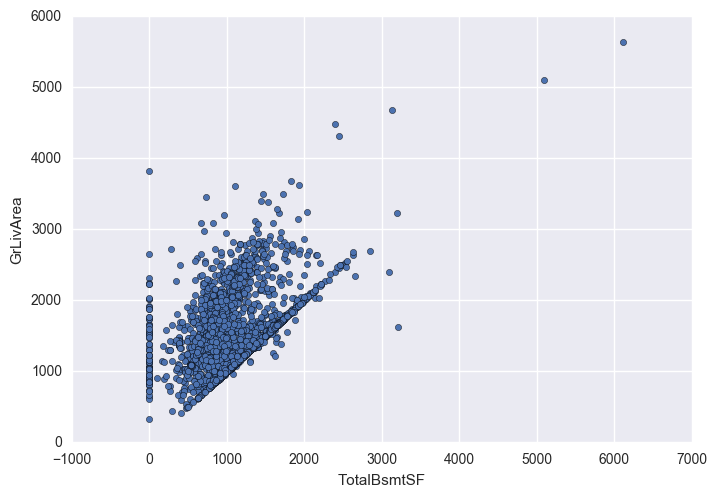

In [75]:
var = 'TotalBsmtSF'
data = pd.concat([combine_df['GrLivArea'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='GrLivArea');
plt.show()

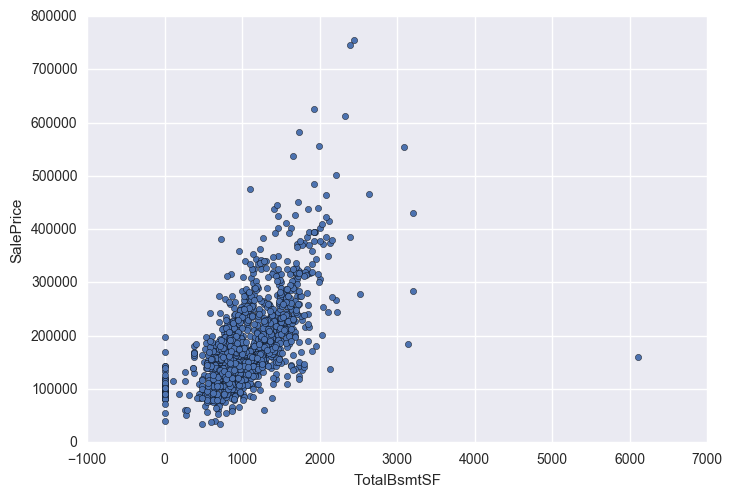

In [76]:
var = 'TotalBsmtSF'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
plt.show()

### Heating
供暖类型

In [77]:
combine_df[combine_df['Heating'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [78]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Heating'])
combine_df['Heating'] = le.transform(combine_df['Heating'])

### HeatingQC
供暖效果

In [79]:
combine_df[combine_df['HeatingQC'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [80]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['HeatingQC'])
combine_df['HeatingQC'] = le.transform(combine_df['HeatingQC'])

### CentralAir
中央空调

In [81]:
combine_df[combine_df['CentralAir'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [82]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['CentralAir'])
combine_df['CentralAir'] = le.transform(combine_df['CentralAir'])

### Electrical
电力系统

In [83]:
combine_df[combine_df['Electrical'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
1380,754,640,0,1,3,0,4,3,0.0,0.0,...,Pave,7,384.0,AllPub,100,10,2007,2008,0,1


In [84]:
combine_df['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [85]:
combine_df.ix[1380, 'Electrical'] = 'SBrkr'

In [86]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Electrical'])
combine_df['Electrical'] = le.transform(combine_df['Electrical'])

### 1stFlrSF
一楼面积

In [87]:
combine_df[combine_df['1stFlrSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [88]:
fst_flr_sf_df = pd.DataFrame(preprocessing.scale(combine_df['1stFlrSF']), np.array(range(1, 2920)), columns=['1stFlrSF'])
fst_flr_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### 2ndFlrSF
二楼面积

In [89]:
combine_df[combine_df['2ndFlrSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [90]:
snd_flr_sf_df = pd.DataFrame(preprocessing.scale(combine_df['2ndFlrSF']), np.array(range(1, 2920)), columns=['2ndFlrSF'])
snd_flr_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### LowQualFinSF
低质量完成的面积

In [91]:
combine_df[combine_df['LowQualFinSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [92]:
low_qual_fin_sf_df = pd.DataFrame(preprocessing.scale(combine_df['LowQualFinSF']), np.array(range(1, 2920)), columns=['LowQualFinSF'])
low_qual_fin_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### GrLivArea
地面以上居住面积

In [93]:
combine_df[combine_df['GrLivArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [94]:
gr_liv_area_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'GrLivArea')), np.array(range(1, 2920)), columns=['GrLivArea'])
gr_liv_area_df.index.name = 'Id'

fix


In [95]:
var = 'GrLivArea'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

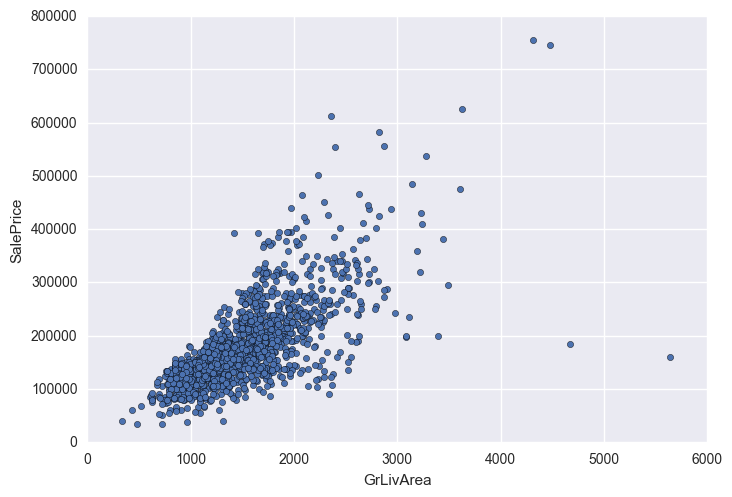

In [96]:
plt.show()

In [97]:
data[(data['SalePrice'] < 200000) & (data['GrLivArea'] > 4000)]

,SalePrice,GrLivArea
Id,,
524,184750.0,4676
1299,160000.0,5642


### BsmtFullBath
地下室全浴室

In [98]:
combine_df[combine_df['BsmtFullBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,0,2,4,0.0,0.0,...,Pave,4,0.0,AllPub,0,70,1950,2008,0,0
2189,3820,0,0,1,5,0,2,4,0.0,0.0,...,Pave,11,0.0,AllPub,0,57,1996,2008,0,0


In [99]:
combine_df['BsmtFullBath'].value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [100]:
combine_df.ix[2121, 'Has_Bsmt']

0

In [101]:
combine_df.ix[2189, 'Has_Bsmt']

0

In [102]:
combine_df['BsmtFullBath'] = combine_df['BsmtFullBath'].fillna(0).astype(np.int)

### BsmtHalfBath
底下室半浴室

In [103]:
combine_df[combine_df['BsmtHalfBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
2121,896,0,0,1,2,0,2,4,0.0,0.0,...,Pave,4,0.0,AllPub,0,70,1950,2008,0,0
2189,3820,0,0,1,5,0,2,4,0.0,0.0,...,Pave,11,0.0,AllPub,0,57,1996,2008,0,0


In [104]:
combine_df['BsmtHalfBath'].value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [105]:
combine_df['BsmtHalfBath'] = combine_df['BsmtHalfBath'].fillna(0).astype(np.int)

### FullBath
地上全浴室个数

In [106]:
combine_df[combine_df['FullBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [107]:
combine_df['FullBath'].value_counts()

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

### HalfBath
地上半浴室个数

In [108]:
combine_df[combine_df['HalfBath'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [109]:
combine_df['HalfBath'].value_counts()

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

### BedroomAbvGr
地上卧室

In [110]:
combine_df[combine_df['BedroomAbvGr'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [111]:
combine_df['BedroomAbvGr'].value_counts()

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

### KitchenAbvGr
地上厨房

In [112]:
combine_df[combine_df['KitchenAbvGr'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [113]:
combine_df['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

### KitchenQual
厨房质量

In [114]:
combine_df[combine_df['KitchenQual'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
1556,725,499,0,1,3,0,0,3,0.0,0.0,...,Pave,6,689.0,AllPub,0,99,1950,2010,0,1


In [115]:
combine_df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [116]:
combine_df.ix[1556, 'KitchenQual'] = 'TA'

In [117]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['KitchenQual'])
combine_df['KitchenQual'] = le.transform(combine_df['KitchenQual'])

### TotRmsAbvGrd
地上的房间总数量

In [118]:
combine_df[combine_df['TotRmsAbvGrd'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [119]:
combine_df['TotRmsAbvGrd'].value_counts()

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
15      1
13      1
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

### Functional
家庭功能

In [120]:
combine_df[combine_df['Functional'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,
2217,733,0,0,1,2,0,2,4,0.0,0.0,...,Pave,4,0.0,AllPub,0,64,1952,2008,0,0
2474,866,504,0,0,3,0,0,3,0.0,0.0,...,Pave,6,771.0,AllPub,14,106,1950,2007,1,1


In [121]:
combine_df['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [122]:
combine_df.ix[2217, 'Functional'] = 'Typ'
combine_df.ix[2474, 'Functional'] = 'Typ'

In [123]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Functional'])
combine_df['Functional'] = le.transform(combine_df['Functional'])

### Fireplaces
壁炉数量

In [124]:
combine_df[combine_df['Fireplaces'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt
Id,,,,,,,,,,,,,,,,,,,,,


In [125]:
combine_df['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

###  HasFireplace
是否有壁炉

In [126]:
combine_df['Has_Fireplace'] = combine_df['FireplaceQu'].apply(lambda x : 0 if pd.isnull(x) else 1)

###  FireplaceQu
壁炉质量

In [127]:
combine_df['FireplaceQu'] = combine_df['FireplaceQu'].fillna('No_Fp')

In [128]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['FireplaceQu'])
combine_df['FireplaceQu'] = le.transform(combine_df['FireplaceQu'])

### Has_GarageType
是否有车库、

In [129]:
combine_df['Has_Garage'] = combine_df['GarageType'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [130]:
combine_df.ix[2127, 'Has_Garage'] = 0
combine_df.ix[2577, 'Has_Garage'] = 0

### GarageType
车库所在位置

In [131]:
type_df = combine_df[combine_df['GarageType'].isnull()]

In [132]:
combine_df['GarageType'] = combine_df['GarageType'].fillna('No_GT')
combine_df.ix[2127, 'GarageType'] = 'No_GT'
combine_df.ix[2577, 'GarageType'] = 'No_GT'

In [133]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['GarageType'])
combine_df['GarageType'] = le.transform(combine_df['GarageType'])

### GarageYrBlt
车库建造年份

In [134]:
yt_df = combine_df[combine_df['GarageYrBlt'].isnull()]

In [135]:
set(yt_df.index) - set(type_df.index)

{2127, 2577}

In [136]:
combine_df['GarageYrBlt'] = combine_df['GarageYrBlt'].fillna(2016)

In [137]:
year_garage_df = 2016 - combine_df['GarageYrBlt']

### GarageCars
车库能停几辆车

In [138]:
combine_df[combine_df['GarageCars'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,
2577,942,886,0,1,3,0,4,3,548.0,0.0,...,859.0,AllPub,174,93,1999,2007,0,1,0,0


In [139]:
combine_df['GarageCars'].median()

2.0

In [140]:
combine_df.ix[2577, 'GarageCars'] = 0

In [141]:
garage_cars_df = pd.DataFrame(preprocessing.scale(fixSkew(combine_df, 'GarageCars')), np.array(range(1, 2920)), columns=['GarageCars'])
garage_cars_df.index.name = 'Id'

notfix


In [142]:
var = 'GarageCars'
data = pd.concat([combine_df['SalePrice'], combine_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
plt.show()

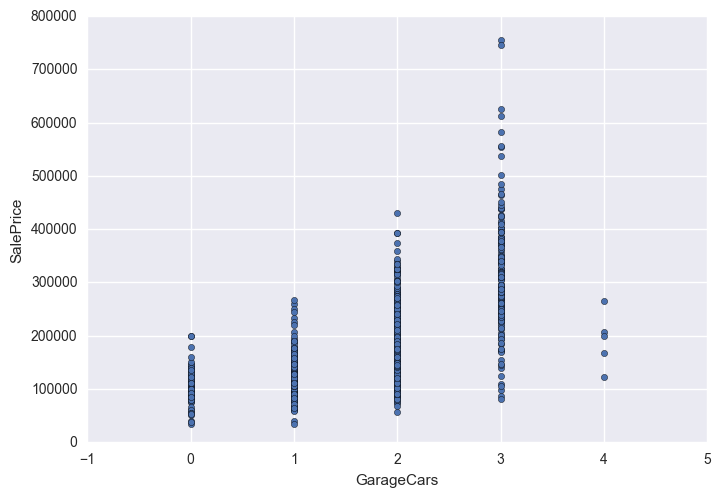

### GarageArea
车库面积

In [144]:
combine_df[combine_df['GarageArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,
2577,942,886,0,1,3,0,4,3,548.0,0.0,...,859.0,AllPub,174,93,1999,2007,0,1,0,0


In [145]:
combine_df.ix[2577, 'GarageArea'] = 0

In [146]:
garage_area_df = pd.DataFrame(preprocessing.scale(combine_df['GarageArea']), np.array(range(1, 2920)), columns=['GarageArea'])
garage_area_df.index.name = 'Id'

### GarageQual
车库质量

In [147]:
combine_df[combine_df['GarageQual'].isnull() & (combine_df['Has_Garage'] == 1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [148]:
combine_df['GarageQual'] = combine_df['GarageQual'].fillna('No_GT')

In [149]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['GarageQual'])
combine_df['GarageQual'] = le.transform(combine_df['GarageQual'])

### GarageCond
车库条件

In [150]:
combine_df[combine_df['GarageCond'].isnull() & (combine_df['Has_Garage'] == 1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [151]:
combine_df['GarageCond'] = combine_df['GarageQual'].fillna('No_GT')

In [152]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['GarageCond'])
combine_df['GarageCond'] = le.transform(combine_df['GarageCond'])

### PavedDrive
汽车开的道路情况

In [153]:
combine_df[combine_df['PavedDrive'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [154]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['PavedDrive'])
combine_df['PavedDrive'] = le.transform(combine_df['PavedDrive'])

### WoodDeckSF
木甲板面积平方英尺


In [155]:
combine_df[combine_df['WoodDeckSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [156]:
wood_deck_df = pd.DataFrame(preprocessing.scale(combine_df['WoodDeckSF']), np.array(range(1, 2920)), columns=['WoodDeckSF'])
wood_deck_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### OpenPorchSF
开放玄关面积平方英尺

In [157]:
combine_df[combine_df['OpenPorchSF'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [158]:
open_porch_sf_df = pd.DataFrame(preprocessing.scale(combine_df['OpenPorchSF']), np.array(range(1, 2920)), columns=['OpenPorchSF'])
open_porch_sf_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### EnclosedPorch
封闭走廊地区平方英尺

In [159]:
combine_df[combine_df['EnclosedPorch'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [160]:
enclose_porch_df = pd.DataFrame(preprocessing.scale(combine_df['EnclosedPorch']), np.array(range(1, 2920)), columns=['EnclosedPorch'])
enclose_porch_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### 3SsnPorch
三面玄关面积平方英尺

In [161]:
combine_df[combine_df['3SsnPorch'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [162]:
three_ssn_porch_df = pd.DataFrame(preprocessing.scale(combine_df['3SsnPorch']), np.array(range(1, 2920)), columns=['3SsnPorch'])
three_ssn_porch_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### ScreenPorch
窗口玄关面积平方英尺

In [163]:
combine_df[combine_df['ScreenPorch'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage
Id,,,,,,,,,,,,,,,,,,,,,


In [164]:
screen_porch_df = pd.DataFrame(preprocessing.scale(combine_df['ScreenPorch']), np.array(range(1, 2920)), columns=['ScreenPorch'])
screen_porch_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### Has_Pool
是否有游泳池

In [165]:
combine_df['Has_Pool'] = combine_df['PoolArea'].apply(lambda x:0 if x == 0 else 1 )

### PoolArea
游泳池面积

In [166]:
combine_df[combine_df['PoolArea'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,


In [167]:
pool_area_df = pd.DataFrame(preprocessing.scale(combine_df['PoolArea']), np.array(range(1, 2920)), columns=['PoolArea'])
pool_area_df.index.name = 'Id'

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


### PoolQC
游泳池质量

In [168]:
combine_df[combine_df['PoolQC'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,1,3,0,4,3,706.0,0.0,...,AllPub,0,13,2003,2008,0,1,0,1,0
2,1262,0,0,1,3,0,4,1,978.0,0.0,...,AllPub,298,40,1976,2007,0,1,1,1,0
3,920,866,0,1,3,0,4,2,486.0,0.0,...,AllPub,0,15,2002,2008,0,1,1,1,0
4,961,756,0,1,3,0,1,3,216.0,0.0,...,AllPub,0,101,1970,2006,0,1,1,1,0
5,1145,1053,0,1,4,0,4,0,655.0,0.0,...,AllPub,192,16,2000,2008,0,1,1,1,0
6,796,566,320,1,1,0,4,3,732.0,0.0,...,AllPub,40,23,1995,2009,0,1,0,1,0
7,1694,0,0,1,3,0,4,0,1369.0,0.0,...,AllPub,255,12,2005,2007,0,1,1,1,0
8,1107,983,0,1,3,0,4,2,859.0,32.0,...,AllPub,235,43,1973,2009,0,1,1,1,0
9,1022,752,0,1,2,0,4,3,0.0,0.0,...,AllPub,90,85,1950,2008,0,1,1,1,0


In [169]:
combine_df['PoolQC'] = combine_df['PoolQC'].fillna('No_Pool')

In [170]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['PoolQC'])
combine_df['PoolQC'] = le.transform(combine_df['PoolQC'])

### Fence
栅栏质量

In [171]:
combine_df[combine_df['Fence'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,1,3,0,4,3,706.0,0.0,...,AllPub,0,13,2003,2008,0,1,0,1,0
2,1262,0,0,1,3,0,4,1,978.0,0.0,...,AllPub,298,40,1976,2007,0,1,1,1,0
3,920,866,0,1,3,0,4,2,486.0,0.0,...,AllPub,0,15,2002,2008,0,1,1,1,0
4,961,756,0,1,3,0,1,3,216.0,0.0,...,AllPub,0,101,1970,2006,0,1,1,1,0
5,1145,1053,0,1,4,0,4,0,655.0,0.0,...,AllPub,192,16,2000,2008,0,1,1,1,0
7,1694,0,0,1,3,0,4,0,1369.0,0.0,...,AllPub,255,12,2005,2007,0,1,1,1,0
8,1107,983,0,1,3,0,4,2,859.0,32.0,...,AllPub,235,43,1973,2009,0,1,1,1,0
9,1022,752,0,1,2,0,4,3,0.0,0.0,...,AllPub,90,85,1950,2008,0,1,1,1,0
10,1077,0,0,1,2,1,4,3,851.0,0.0,...,AllPub,0,77,1950,2008,0,1,1,1,0


In [172]:
combine_df['Fence'] = combine_df['Fence'].fillna('No_Fence')

In [173]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['Fence'])
combine_df['Fence'] = le.transform(combine_df['Fence'])

### MoSold
销售的月份


In [174]:
combine_df[combine_df['MoSold'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,


In [175]:
combine_df['MoSold'].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

### YrSold
销售的年份

In [176]:
combine_df[combine_df['YrSold'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,


In [177]:
combine_df['YrSold'].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

### SaleType
销售的类型

In [178]:
combine_df[combine_df['SaleType'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,
2490,1176,0,0,1,3,0,4,2,190.0,873.0,...,AllPub,0,58,1998,2007,0,1,1,1,0


In [179]:
combine_df['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [180]:
combine_df.ix[2490, 'SaleType'] = 'WD'

In [181]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['SaleType'])
combine_df['SaleType'] = le.transform(combine_df['SaleType'])

### SaleCondition
销售条件

In [182]:
combine_df[combine_df['SaleCondition'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Access,Has_Bsmt,Has_Fireplace,Has_Garage,Has_Pool
Id,,,,,,,,,,,,,,,,,,,,,


In [183]:
le = preprocessing.LabelEncoder()
le.fit(combine_df['SaleCondition'])
combine_df['SaleCondition'] = le.transform(combine_df['SaleCondition'])

In [184]:
###  MiscFeature
#另外一些特征

#### 排除的特征 
【Street】：不平衡  
【Utilities】：不平衡  
【Condition2】：不平衡

### 特征合并
合并所有特征   
分离训练集和测试集

In [203]:
X_df = pd.merge(gr_liv_area_df, bsmt_fin_SF1_df, left_index=True, right_index=True)

#单变量相关性低
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['Heating']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['Alley_Access']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['Alley']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['Has_Pool']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pool_area_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['BldgType']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['BsmtCond']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['GarageCond']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, low_qual_fin_sf_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['BsmtHalfBath']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['ExterQual']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['Has_Fireplace']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['KitchenAbvGr']), left_index=True, right_index=True)

# X_df = pd.merge(X_df, enclose_porch_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, three_ssn_porch_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, screen_porch_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['MoSold']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['YrSold']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, lot_frontage_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, mas_vnr_area_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['GarageYrBlt']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['BedroomAbvGr']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['BsmtFullBath']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, bsmt_unf_sf_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, bsmt_fin_SF2_df, left_index=True, right_index=True)
# 

#*******************************************************************************************************************************

#多变量相关性冗余的特征

# X_df = pd.merge(X_df, garage_area_df, left_index=True, right_index=True)
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['TotRmsAbvGrd']), left_index=True, right_index=True)
# X_df = pd.merge(X_df, fst_flr_sf_df, left_index=True, right_index=True)
#*******************************************************************************************************************************
# 学习模型中弱相关的特征
# X_df = pd.merge(X_df, pd.DataFrame(combine_df['PoolQC']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['Fence']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['SaleType']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['MasVnrType']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['ExterCond']), left_index=True, right_index=True)
#X_df = pd.merge(X_df, pd.DataFrame(combine_df['Condition2']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['CentralAir']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['Foundation']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['BsmtFinType1']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['RoofMatl']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['HeatingQC']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['Has_Garage']), left_index=True, right_index=True)


#测试
#X_df = pd.merge(gr_liv_area_df, overall_qual_df, left_index=True, right_index=True)
X_df = pd.merge(X_df, lot_area_df, left_index=True, right_index=True)
X_df = pd.merge(X_df, overall_qual_df, left_index=True, right_index=True)
#*******************************************************************************************************************************


X_df = pd.merge(X_df, pd.DataFrame(combine_df['GarageQual']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['Electrical']), left_index=True, right_index=True)

X_df = pd.merge(X_df, total_bsmt_sf_df, left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['LotShape']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['LandContour']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['LotConfig']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['Neighborhood']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['Condition1']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['HouseStyle']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['FullBath']), left_index=True, right_index=True)


#X_df = pd.merge(X_df, overall_cond_df, left_index=True, right_index=True)
X_df = pd.merge(X_df, year_built_df, left_index=True, right_index=True)
X_df = pd.merge(X_df, year_remodadd_df, left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['RoofStyle']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['Exterior1st']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['Exterior2nd']), left_index=True, right_index=True)




X_df = pd.merge(X_df, pd.DataFrame(combine_df['Has_Bsmt']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['BsmtQual']), left_index=True, right_index=True)


X_df = pd.merge(X_df, pd.DataFrame(combine_df['BsmtExposure']), left_index=True, right_index=True)


X_df = pd.merge(X_df, pd.DataFrame(combine_df['BsmtFinType2']), left_index=True, right_index=True)



X_df = pd.merge(X_df, snd_flr_sf_df, left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['HalfBath']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['KitchenQual']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['Functional']), left_index=True, right_index=True)

X_df = pd.merge(X_df, pd.DataFrame(combine_df['FireplaceQu']), left_index=True, right_index=True)
X_df = pd.merge(X_df, pd.DataFrame(combine_df['GarageType']), left_index=True, right_index=True)

X_df = pd.merge(X_df, garage_cars_df, left_index=True, right_index=True)
X_df = pd.merge(X_df, wood_deck_df, left_index=True, right_index=True)
X_df = pd.merge(X_df, open_porch_sf_df, left_index=True, right_index=True)



X_df = pd.merge(X_df, pd.DataFrame(combine_df['SaleCondition']), left_index=True, right_index=True)

In [204]:
X_final_df = X_df.drop([524, 1299])



In [205]:
X_train_df = X_final_df.loc[1:1460]

In [206]:
X_test_df = X_final_df.loc[1461:2919]

In [207]:
#norm_y = preprocessing.scale(train_df['SalePrice'])


In [208]:
X_train_df.to_csv('../data/offline/X_train.csv', header = True, index=True)
X_test_df.to_csv('../data/offline/X_test.csv', header = True, index=True)


In [209]:
train_final_df = train_df.drop([524, 1299])
y_train_df =  np.log1p(train_final_df['SalePrice'])
y_train_df.to_csv('../data/offline/y_train.csv', header = True, index=True)